# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [22]:
import pandas as pd

In [16]:
petrol_info = pd.read_csv("petrol.csv", skipinitialspace=True)
petrol_info

,tax,income,highway,dl,consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [17]:
petrol_info.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [20]:
Q1 = petrol_info.consumption.quantile(0.25)
Q3 = petrol_info.consumption.quantile(0.75)
IQR = Q3 - Q1
minimum_cap = Q1 - 1.5 * IQR
maximum_cap = Q3 + 1.5 * IQR


print("Q1 - ", Q1)
print("Q3 - ", Q3)
print("IQR - ", IQR)
print("Minimum Cap - ", minimum_cap)
print("Maximum Cap - ", maximum_cap)

petrol_data_excluding_outliers = petrol_info[(petrol_info.consumption >= minimum_cap) & (petrol_info.consumption <= maximum_cap)]
print("\nTotal Number of records after excluding outliers = ", petrol_data_excluding_outliers.consumption.size)
print("\nPetrol Consumption Data excluding outliers")
petrol_data_excluding_outliers

Q1 -  509.5
Q3 -  632.75
IQR -  123.25
Minimum Cap -  324.625
Maximum Cap -  817.625

Total Number of records after excluding outliers =  46

Petrol Consumption Data excluding outliers


,tax,income,highway,dl,consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

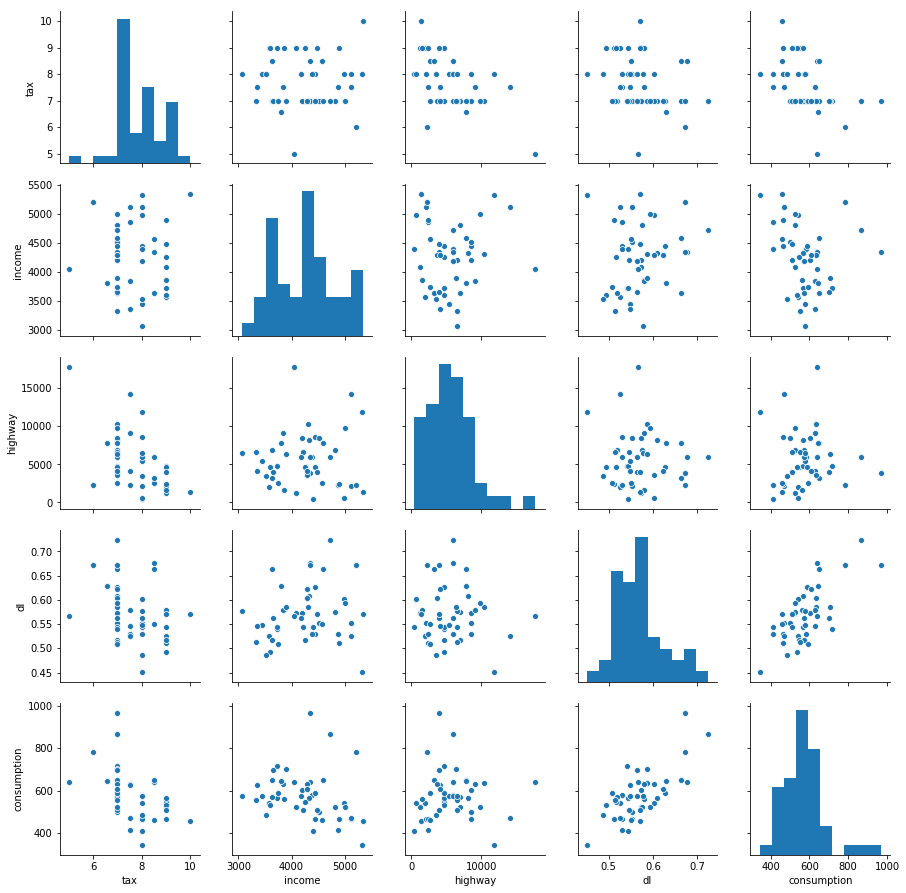

In [23]:
# Seaborn 
import seaborn as sns
# Create the default pairplot
sns.pairplot(petrol_info)

In [ ]:
# drivers increase the consumption increases

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [24]:
X = petrol_info.iloc[:, 3:4]
X

,dl
0,0.525
1,0.572
2,0.580
3,0.529
4,0.544
5,0.571
6,0.451
7,0.553
8,0.529
9,0.552


In [26]:
Y = petrol_info.iloc[:, 4:5]
Y

,consumption
0,541
1,524
2,561
3,414
4,410
5,457
6,344
7,467
8,464
9,498


# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8)

In [28]:
print("---- Training data for 'X' ----")
print(x_train)
print('Shape of x_train data = ', x_train.shape)

print("\n---- Test data for 'X' ----")
print(x_test)
print('Shape of x_test data = ', x_test.shape)

print("\n---- Training data for 'Y' ----")
print(y_train)
print('Shape of y_train data = ', y_train.shape)

print("\n---- Test data for 'Y' ----")
print(y_test)
print('Shape of y_test data = ', y_test.shape)

---- Training data for 'X' ----
       dl
41  0.563
7   0.553
11  0.525
37  0.586
34  0.487
19  0.677
45  0.571
6   0.451
22  0.511
47  0.593
35  0.629
33  0.547
4   0.544
28  0.563
17  0.540
39  0.672
27  0.579
23  0.517
14  0.608
5   0.571
24  0.551
3   0.529
13  0.545
38  0.663
36  0.566
30  0.518
46  0.623
29  0.493
44  0.672
18  0.724
8   0.529
43  0.508
9   0.552
21  0.602
20  0.663
12  0.574
15  0.586
25  0.544
Shape of x_train data =  (38, 1)

---- Test data for 'X' ----
       dl
1   0.572
26  0.548
16  0.572
31  0.513
40  0.626
0   0.525
2   0.580
10  0.530
32  0.578
42  0.603
Shape of x_test data =  (10, 1)

---- Training data for 'Y' ----
    consumption
41          699
7           467
11          471
37          704
34          487
19          640
45          510
6           344
22          464
47          524
35          644
33          628
4           410
28          574
17          714
39          968
27          631
23          547
14          566
5           457
24   

# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [29]:
from sklearn.linear_model import LinearRegression

# Train using linear regression
linear_reg = LinearRegression().fit(X, Y)

b1 = linear_reg.coef_[0][0]
print("Coefficient (Slope) = ", b1)
b0 = linear_reg.intercept_[0]
print("Intercept = ", b0)

Coefficient (Slope) =  1409.8421113288002
Intercept =  -227.3091174945256


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [30]:
print("Accuracy score on trained data = ", linear_reg.score(x_train, y_train))
print("Accuracy score on test data = ", linear_reg.score(x_test, y_test))

Accuracy score on trained data =  0.5121042786838645
Accuracy score on test data =  -1.1093189627643598


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [31]:
A = petrol_info.iloc[:, 1:2]
A

,income
0,3571
1,4092
2,3865
3,4870
4,4399
5,5342
6,5319
7,5126
8,4447
9,4512


In [32]:
B = petrol_info.iloc[:, 2:3]
B

,highway
0,1976
1,1250
2,1586
3,2351
4,431
5,1333
6,11868
7,2138
8,8577
9,8507


Coefficient (Slope) =  0.30532856864872926
Intercept =  4270.263766553532


In [34]:
a_train, a_test, b_train, b_test = train_test_split(A, B, test_size=0.2, train_size=0.8)
print("Accuracy score on trained data = ", linear_reg.score(a_train, b_train))
print("Accuracy score on test data = ", linear_reg.score(a_test, b_test))

Accuracy score on trained data =  -0.025526206271090368
Accuracy score on test data =  -0.39805980758596826


# Question 9: Print the coefficients of the multilinear regression model

In [35]:
# Train using linear regression
linear_reg = LinearRegression().fit(A, B)

b1 = linear_reg.coef_[0][0]
print("Coefficient (Slope) = ", b1)
b0 = linear_reg.intercept_[0]
print("Intercept = ", b0)

Coefficient (Slope) =  0.30532856864872926
Intercept =  4270.263766553532


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis